In [123]:
pip install Kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder,StandardScaler
from kneed import KneeLocator

In [125]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
#getting information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [127]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [128]:
#renaming column
new={'Genre':'Gender','Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}

df.rename(columns=new,inplace=True)


In [129]:
#converting annual income into INR from 1000$--
# 1$=88
df['Annual Income']=df['Annual Income']*1000*88

In [130]:
#dropping unwanted column i.e customer id
df=df.drop('CustomerID',axis=1)

In [131]:
copied_dataset=df.copy()
copied_dataset

,Gender,Age,Annual Income,Spending Score
0,Male,19,1320000,39
1,Male,21,1320000,81
2,Female,20,1408000,6
3,Female,23,1408000,77
4,Female,31,1496000,40
...,...,...,...,...
195,Female,35,10560000,79
196,Female,45,11088000,28
197,Male,32,11088000,74
198,Male,32,12056000,18


In [132]:
#converting gender column into numeric 
obj=LabelEncoder()
df['Gender']=obj.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [133]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,1320000,39
1,1,21,1320000,81
2,0,20,1408000,6
3,0,23,1408000,77
4,0,31,1496000,40


In [134]:
#scaling 
obj=StandardScaler()
scaled=obj.fit_transform(df)
df=pd.DataFrame(scaled,columns=df.columns)

In [135]:
df

,Gender,Age,Annual Income,Spending Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


<Axes: xlabel='Gender', ylabel='count'>

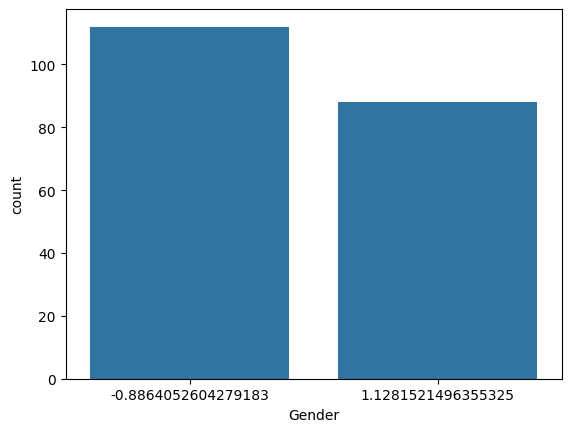

In [136]:
sns.countplot(x='Gender',data=df)

Text(0.5, 1.0, 'Annual income vs spending score')

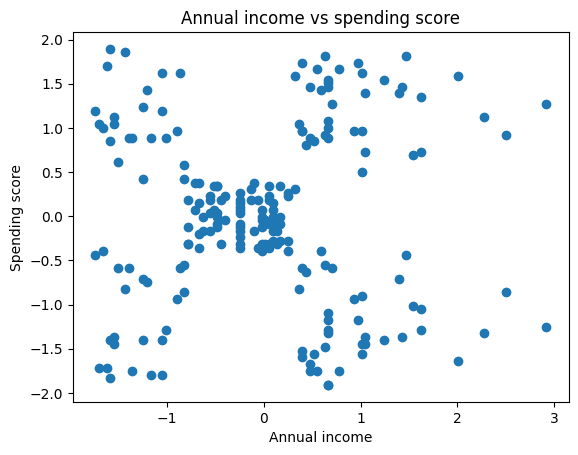

In [137]:
plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Annual income vs spending score')

In [138]:
#getting inertia values to identify value of x
out=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(df)
    out.append(model.inertia_)
print(out)

[799.9999999999999, 597.947293793228, 494.8037500130457, 395.3920903479796, 351.7432061711911, 277.3897401985191, 251.15484911190177, 211.98576294959304, 185.72807688711413, 152.02983429775688]


In [139]:
#finding extact value of cluster
k_values=list(range(1,11))
kl=KneeLocator(k_values,out,curve='convex',direction='decreasing')
k=kl.elbow
k

np.int64(6)

Text(0.5, 1.0, 'Elbow curve')

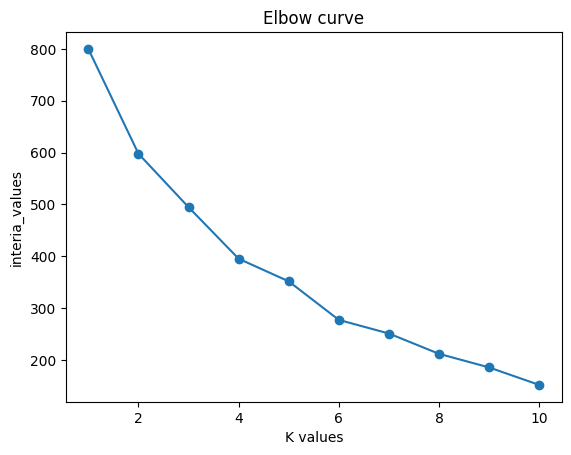

In [140]:
#plotting elbow curve
plt.plot(range(1,11),out,marker='o')
plt.xlabel('K values')
plt.ylabel('interia_values')
plt.title('Elbow curve')

#kMeans clustering

In [141]:
#doing kmeans clustering
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [142]:
labels=model.labels_
labels

array([1, 1, 2, 8, 2, 8, 2, 8, 0, 8, 0, 8, 2, 8, 2, 1, 2, 1, 0, 8, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 8, 0, 8, 0, 1, 2, 8, 2, 8, 2, 8, 4, 1, 0, 6,
       2, 8, 4, 6, 6, 6, 4, 1, 6, 0, 4, 0, 4, 0, 6, 0, 0, 1, 4, 4, 0, 1,
       4, 4, 1, 6, 0, 4, 4, 4, 0, 1, 4, 1, 6, 4, 0, 1, 0, 4, 6, 0, 4, 6,
       6, 4, 4, 1, 0, 6, 6, 1, 4, 6, 0, 1, 6, 4, 0, 1, 0, 6, 4, 0, 0, 0,
       0, 6, 6, 1, 6, 6, 4, 4, 4, 4, 1, 6, 6, 7, 6, 3, 5, 7, 0, 7, 5, 7,
       6, 3, 5, 3, 9, 7, 5, 3, 9, 7, 6, 3, 5, 7, 5, 3, 9, 7, 5, 7, 9, 3,
       9, 3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 9, 7, 5, 7, 5, 7, 9, 3,
       5, 7, 5, 7, 9, 3, 5, 3, 9, 7, 9, 7, 9, 3, 9, 3, 5, 3, 9, 3, 9, 7,
       5, 7], dtype=int32)

In [143]:
#getting centroids for each cluster
centers=kmeans.cluster_centers_
centers

array([[-0.01343038,  1.13750203, -0.5213944 , -0.39856802],
       [ 0.29862851,  0.17329545,  1.06645385, -1.2980103 ],
       [ 1.12815215, -0.72911539,  0.01315937,  0.77791013],
       [-0.88640526, -0.67998938, -0.08638219,  0.55272197]])

Text(0.5, 1.0, 'Annual income vs spending score')

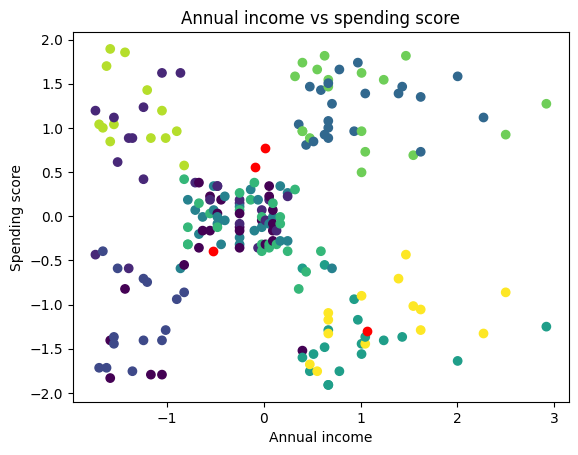

In [144]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=labels)
plt.scatter(centers[:,2],centers[:,3],c='red')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Annual income vs spending score')

In [145]:
from sklearn.metrics import silhouette_score
silhouette_score(df,labels)

0.42076374869477745

In [146]:
#herirachical clustering
AggloClustering=AgglomerativeClustering(n_clusters=4)
AggloClustering.fit(df)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [147]:
aclabels=AggloClustering.labels_
aclabels

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [148]:
silhouette_score(df,labels)

0.42076374869477745

Text(0.5, 1.0, 'Annual income vs spending score by Hierarchical clustering')

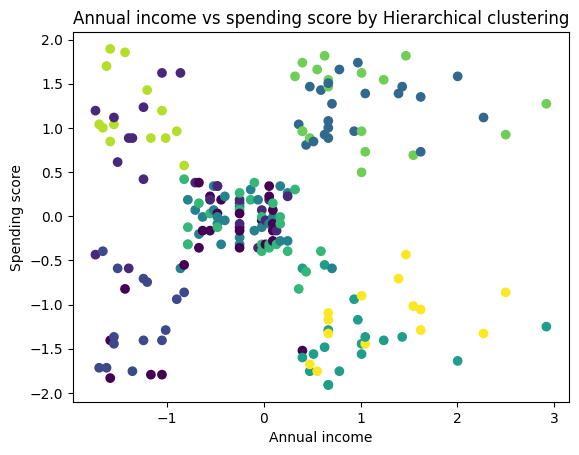

In [149]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=labels)
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Annual income vs spending score by Hierarchical clustering')

#DBSCAN 

In [150]:
dbscan=DBSCAN(eps=0.5,min_samples=4)
dbscan.fit(df)
dblabels=dbscan.labels_
dblabels


array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  1,  2,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  2, -1,  2,  0, -1,  0, -1, -1,
       -1,  0, -1, -1,  2,  0, -1, -1,  5,  4, -1,  0,  3,  4,  4,  4,  3,
       -1,  4,  5,  3,  5,  3,  5,  4,  5,  5, -1, -1,  3,  5, -1,  3, -1,
       -1,  4,  5,  3,  3,  3,  5,  6,  3, -1,  4,  3,  5, -1,  5,  3,  4,
        5,  3,  4, -1,  3, -1,  6,  5,  4,  4,  6,  3,  4,  5,  6,  4,  3,
        5,  6,  5,  4, -1,  5,  5,  5,  5,  4,  4,  6,  4,  4, -1,  3,  3,
        3,  6,  4, -1,  7,  4,  8, -1,  7, -1, -1, -1, -1,  4,  8,  9,  8,
       -1, -1,  9,  8, -1,  7,  4,  8,  9, -1, -1,  8, -1,  7, 10,  7, -1,
        8, -1,  8, -1,  8, -1,  8, -1,  8,  9,  8, -1,  8, 10,  8, 11, -1,
       10, -1, 10,  7, -1,  8, -1, -1, -1,  7, 11,  8, -1,  8, 11, -1, -1,
       -1, -1,  8, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Text(0.5, 1.0, 'Annual Income v/s Spending score')

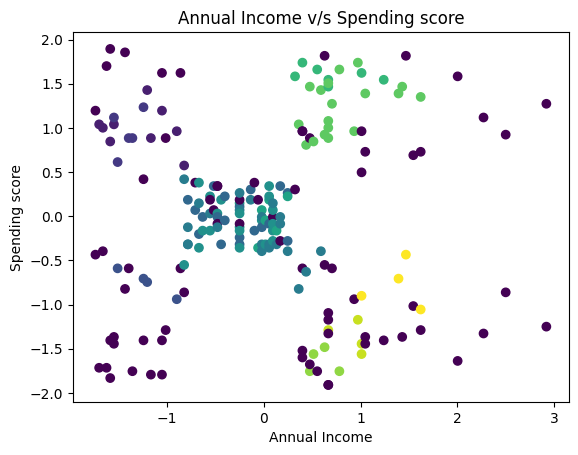

In [151]:
#plotting clusters from the dbmodel
plt.scatter(df.iloc[:,2],df.iloc[:,3],c=dblabels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual Income v/s Spending score')

#we will be choosing Hierarical cluster i.e agglomerative clustering has compare to other it got grouped better


In [152]:
aclabels

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [153]:
copied_dataset['Labels']=aclabels
copied_dataset.head()

,Gender,Age,Annual Income,Spending Score,Labels
0,Male,19,1320000,39,1
1,Male,21,1320000,81,1
2,Female,20,1408000,6,0
3,Female,23,1408000,77,1
4,Female,31,1496000,40,0


In [154]:
groups=copied_dataset.groupby('Labels')
groups.groups

{0: [2, 4, 6, 8, 10, 12, 16, 18, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 50, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 66, 67, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 85, 86, 89, 90, 92, 96, 98, 101, 102, 104, 106, 107, 108, 109, 110, 116, 117, 118, 119, 126, 146], 1: [0, 1, 3, 5, 7, 9, 11, 13, 14, 15, 17, 19, 20, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 48, 49, 51, 52, 58, 61, 65, 68, 69, 75, 78, 84, 87, 88, 91, 93, 94, 95, 97, 99, 100, 103, 105, 111, 112, 113, 114, 115, 120, 121, 122, 124, 132, 142], 2: [128, 130, 134, 136, 138, 140, 144, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198], 3: [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]}

In [155]:
groups.get_group(3)

,Gender,Age,Annual Income,Spending Score,Labels
123,Male,39,6072000,91,3
125,Female,31,6160000,77,3
127,Male,40,6248000,95,3
129,Male,38,6248000,75,3
131,Male,39,6248000,75,3
133,Female,31,6336000,71,3
135,Female,29,6424000,88,3
137,Male,32,6424000,73,3
139,Female,35,6512000,72,3
141,Male,32,6600000,93,3


In [156]:
d={0:'Average incomwe with low spending',
1:'low incomw with high spending',
2:'High income with low spending',
3:'High income with High spending'}

In [157]:
copied_dataset['labels']=copied_dataset['Labels'].map(d)

In [158]:
copied_dataset.head()

,Gender,Age,Annual Income,Spending Score,Labels,labels
0,Male,19,1320000,39,1,low incomw with high spending
1,Male,21,1320000,81,1,low incomw with high spending
2,Female,20,1408000,6,0,Average incomwe with low spending
3,Female,23,1408000,77,1,low incomw with high spending
4,Female,31,1496000,40,0,Average incomwe with low spending


In [159]:
copied_dataset.to_csv('copydataset.csv')

In [160]:
with open('Agglomodel.pkl','wb') as file:
    pickle.dump(AggloClustering,file)

df.to_csv('orginal_df.csv')
#scaled data


In [163]:
#creating pickle of obj i.e standardscaler 
#for prediction in frontend we need obj to scale values
with open('scaled_obj.pkl','wb') as file:
    pickle.dump(obj,file)